In [1]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from causallearn.search.ConstraintBased.PC import pc

import functions

In [2]:
low_scatter_para=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','M_BH']

In [3]:
easy_obs_para=['LogSigma0','Concentration_Index','logSigma0sph','log_sigma0','dc','logRhphi','M*_sph','ube','bri25','bve','bvtc','logR10phi','M*_gal','log_B/T',
 'Pseudobulge','logRh','log_n_sph_eq','blum','log_R_e_sph_maj','logblum','AGN','Multiple','log_n_sph_maj','logR10','Ring','BCG','Disk','cD',
 'Bar','Core','Compactness','ETG','T-type','M_BH']

In [4]:
df_full = pd.read_csv('SMBH_Data_0522.csv',header=1)
df_low_scatter = df_full[low_scatter_para].dropna(axis='index',how='any')
df_easy_obs = df_full[easy_obs_para].dropna(axis='index',how='any')
len(df_low_scatter),len(df_easy_obs)

(100, 100)

## Low scatter

Training Set RMSE:  0.17292621620217022
Test Set RMSE:  0.33713413650949187


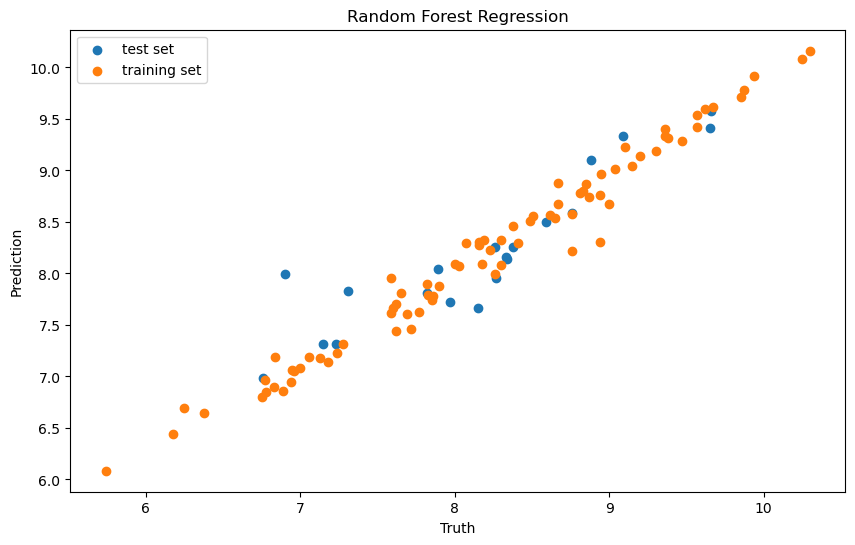

In [5]:
df = df_low_scatter.copy()
keys = low_scatter_para.copy()
keys.remove('M_BH')
X = df[keys]
y = df['M_BH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees (None means unlimited)
random_state = 0    # Random seed for reproducibility

rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the training and test set loss (Mean Squared Error)
# functions.rmse
#train_loss = np.mean((y_train - rf_regressor.predict(X_train)) ** 2)
#test_loss = np.mean((y_test - y_pred) ** 2)
train_rmse = functions.rmse(y_train,rf_regressor.predict(X_train))
test_rmse = functions.rmse(y_test,y_pred)

print("Training Set RMSE: ",train_rmse)
print("Test Set RMSE: ",test_rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="test set")
plt.scatter(y_train, rf_regressor.predict(X_train), label="training set")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

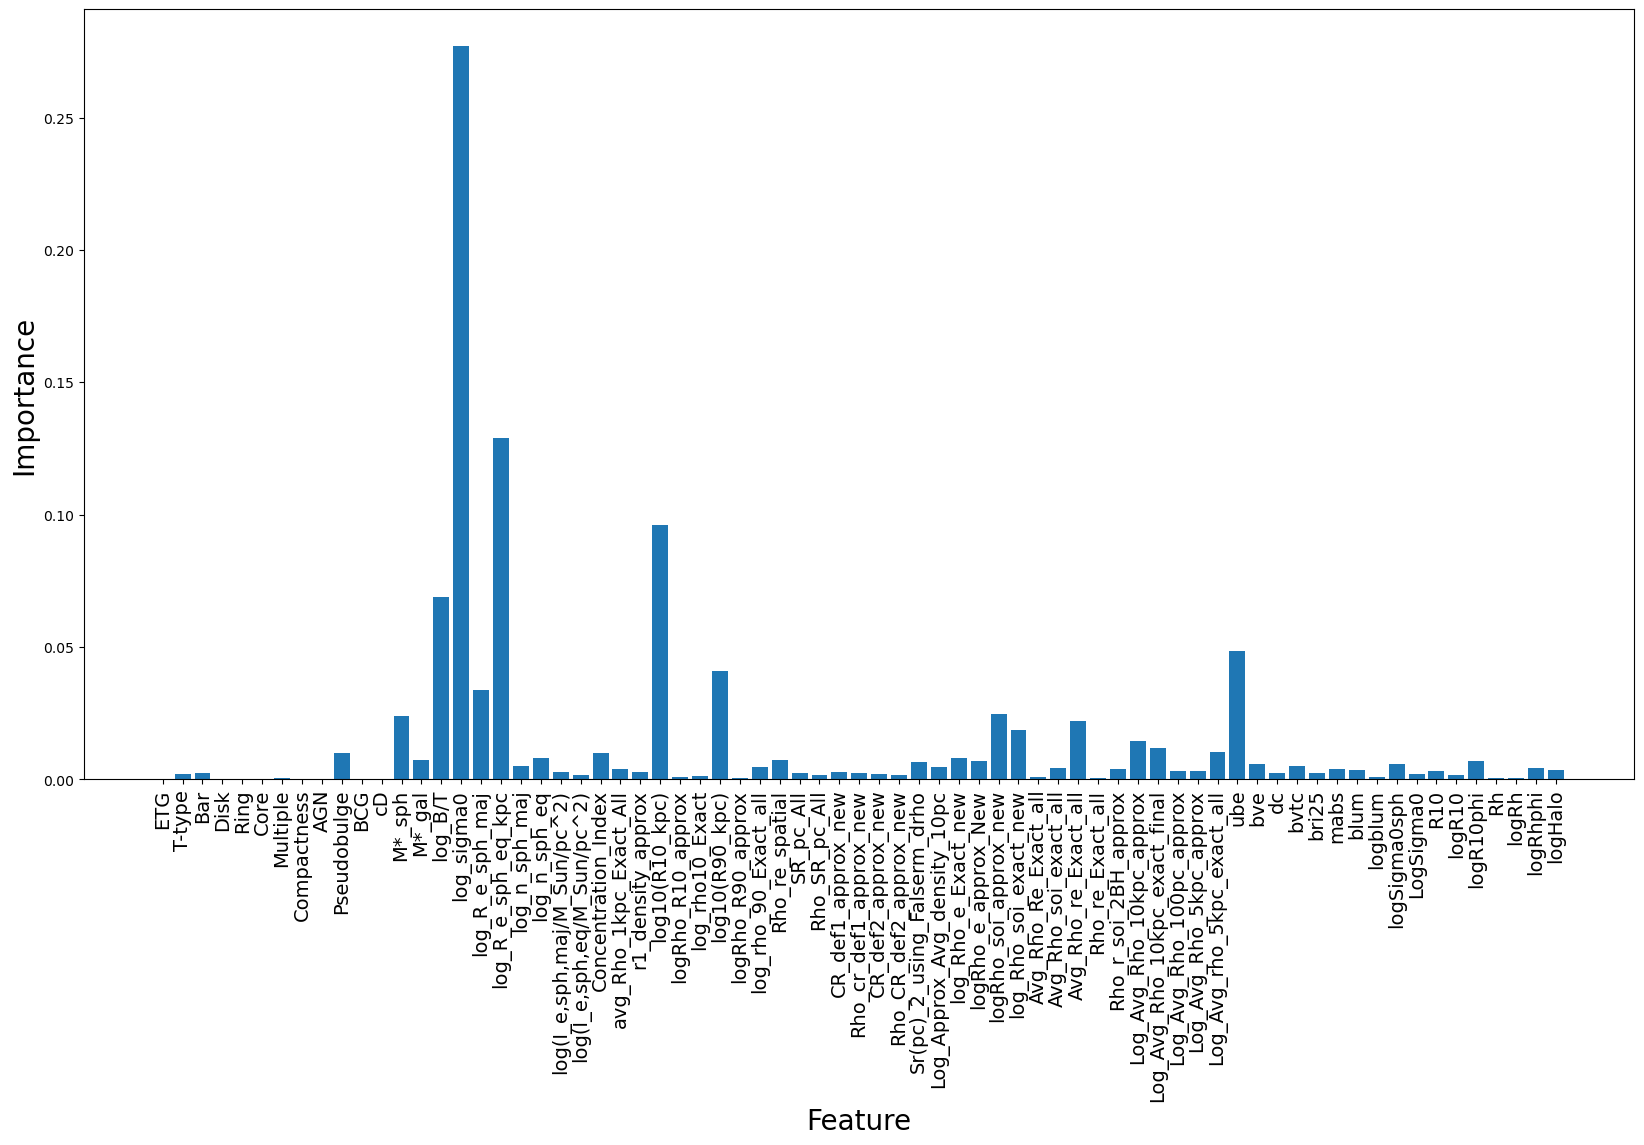

In [6]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

x_ticks_labels = X.columns
x_ticks=np.arange(len(feature_importances))
# Plot feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X.shape[1]), feature_importances, align="center")
plt.xlabel("Feature",fontsize=20)
plt.ylabel("Importance",fontsize=20)
plt.xticks(ticks=x_ticks,labels=x_ticks_labels, rotation=90, fontsize=14)
plt.show()

In [7]:
importance_order=feature_importances.argsort()[::-1]
importance=np.sort(feature_importances)[::-1]
#importance_order
for i in range(len(importance_order)):
    print(i+1,X.columns[importance_order[i]],importance[i])

1 log_sigma0 0.27701477734950775
2 log_R_e_sph_eq_kpc 0.12881458819408206
3 log10(R10_kpc) 0.09594371640678424
4 log_B/T 0.06873542787588427
5 ube 0.048332632658789086
6 log10(R90_kpc) 0.041006040144150956
7 log_R_e_sph_maj 0.033819147096210304
8 logRho_soi_approx_new 0.024618726544306586
9 M*_sph 0.023894521732413767
10 Avg_Rho_re_Exact_all 0.02185342170184103
11 log_Rho_soi_exact_new 0.01858988476319111
12 Log_Avg_Rho_10kpc_approx 0.014456302914871015
13 Log_Avg_Rho_10kpc_exact_final 0.011698466611258342
14 Log_Avg_rho_5kpc_exact_all 0.010167957877098517
15 Pseudobulge 0.010140856879579037
16 Concentration_Index 0.010139432389320026
17 log_n_sph_eq 0.008199276348584892
18 log_Rho_e_Exact_new 0.007949511932657223
19 Rho_re_spatial 0.0072658861265935
20 M*_gal 0.007234734324552365
21 logR10phi 0.00704196949288134
22 logRho_e_approx_New 0.006808397242103216
23 Sr(pc)_2_using_Falserm_drho 0.006681412546723949
24 logSigma0sph 0.005901000775785453
25 bve 0.005736299356348372
26 log_n_sph_m

In [8]:
X.columns[importance_order][:10]

Index(['log_sigma0', 'log_R_e_sph_eq_kpc', 'log10(R10_kpc)', 'log_B/T', 'ube',
       'log10(R90_kpc)', 'log_R_e_sph_maj', 'logRho_soi_approx_new', 'M*_sph',
       'Avg_Rho_re_Exact_all'],
      dtype='object')

In [15]:
functions.test_relation(['log_sigma0', 'log_R_e_sph_eq_kpc', 'log10(R10_kpc)', 'log_B/T', 'ube',
       'log10(R90_kpc)', 'log_R_e_sph_maj', 'logRho_soi_approx_new', 'M*_sph',
       'Avg_Rho_re_Exact_all'],ncyclesperiteration=5000,niterations=300)

104


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1761: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. Consider using feature selection techniques to select the most important features (you can do this automatically with the `select_k_features` parameter), or, alternatively, doing a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_R_e_sph_eq_kpc
x 2 : log10(R10_kpc)
x 3 : log_B/T
x 4 : ube
x 5 : log10(R90_kpc)
x 6 : log_R_e_sph_maj
x 7 : logRho_soi_approx_new
x 8 : M*_sph
x 9 : Avg_Rho_re_Exact_all
Eq. selected rmse: 0.1869482142074538


x0*(0.18446869525390908*x3/(-x2 + x5*(x5 + 1.185679770080822) - 0.48852306032854415) - 0.18446869525390908*x7 + 4.188149340050974)

Eq. 0 rmse: 0.9172014405196003


8.252746645955751

Eq. 1 rmse: 0.4094850455557965


x8 - 2.357421793989867

Eq. 2 rmse: 0.3469071427676178


3.905299989548264*x0 + x2

Eq. 3 rmse: 0.2826974582160201


4.153790636609139*x0 - 0.4247802008604556*x7

Eq. 4 rmse: 0.2413410481917192


x0*(0.13901558114826132*x5 - 0.13901558114826132*x7 + 3.881774656517694)

Eq. 5 rmse: 0.2180627269458431


x0*(-0.1963353743825975*x2 + 0.1963353743825975*x5 - 0.1963353743825975*x7 + 3.854745531978531)

Eq. 6 rmse: 0.21524344905568923


3.5455221703323216*x0 - 0.4908103175066583*x2 + 0.4908103175066583*x5 - 0.4908103175066583*x7 + 0.8012210920946445

Eq. 7 rmse: 0.21199782332394318


x0*(-0.40355168380923568*x2 + 0.24739021827630002*x5 - 0.24739021827630002*x7 + 3.8481913463141777)

Eq. 8 rmse: 0.20852735770426176


3.5455221703323216*x0 - 0.76005117099037846*x2 + 0.5542394868413092*x5 - 0.5542394868413092*x7 + 0.7701308289136042

Eq. 9 rmse: 0.1869482142074538


x0*(0.18446869525390908*x3/(-x2 + x5*(x5 + 1.185679770080822) - 0.48852306032854415) - 0.18446869525390908*x7 + 4.188149340050974)

## Easy-to-use

Training Set RMSE:  0.18205866053280656
Test Set RMSE:  0.31142177107581953


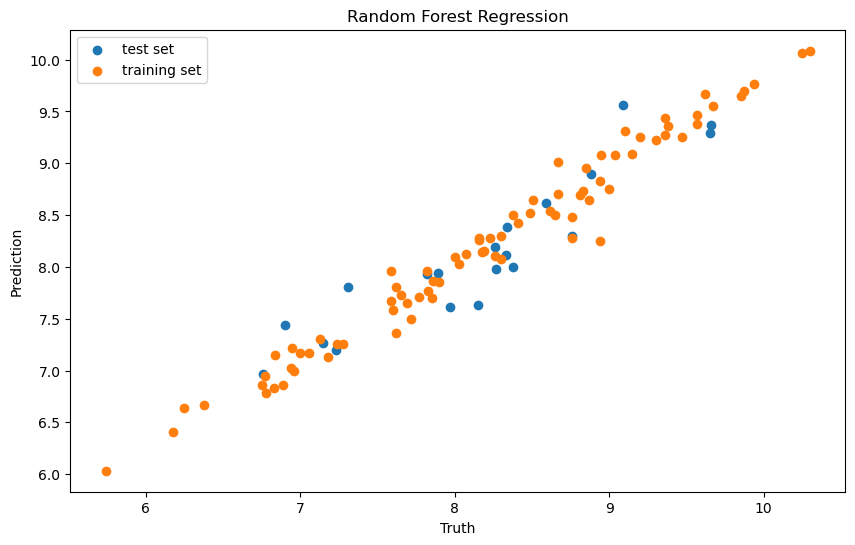

In [10]:
df = df_easy_obs.copy()
keys = easy_obs_para.copy()
keys.remove('M_BH')
X = df[keys]
y = df['M_BH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees (None means unlimited)
random_state = 0    # Random seed for reproducibility

rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the training and test set loss (Mean Squared Error)
# functions.rmse
#train_loss = np.mean((y_train - rf_regressor.predict(X_train)) ** 2)
#test_loss = np.mean((y_test - y_pred) ** 2)
train_rmse = functions.rmse(y_train,rf_regressor.predict(X_train))
test_rmse = functions.rmse(y_test,y_pred)

print("Training Set RMSE: ",train_rmse)
print("Test Set RMSE: ",test_rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="test set")
plt.scatter(y_train, rf_regressor.predict(X_train), label="training set")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

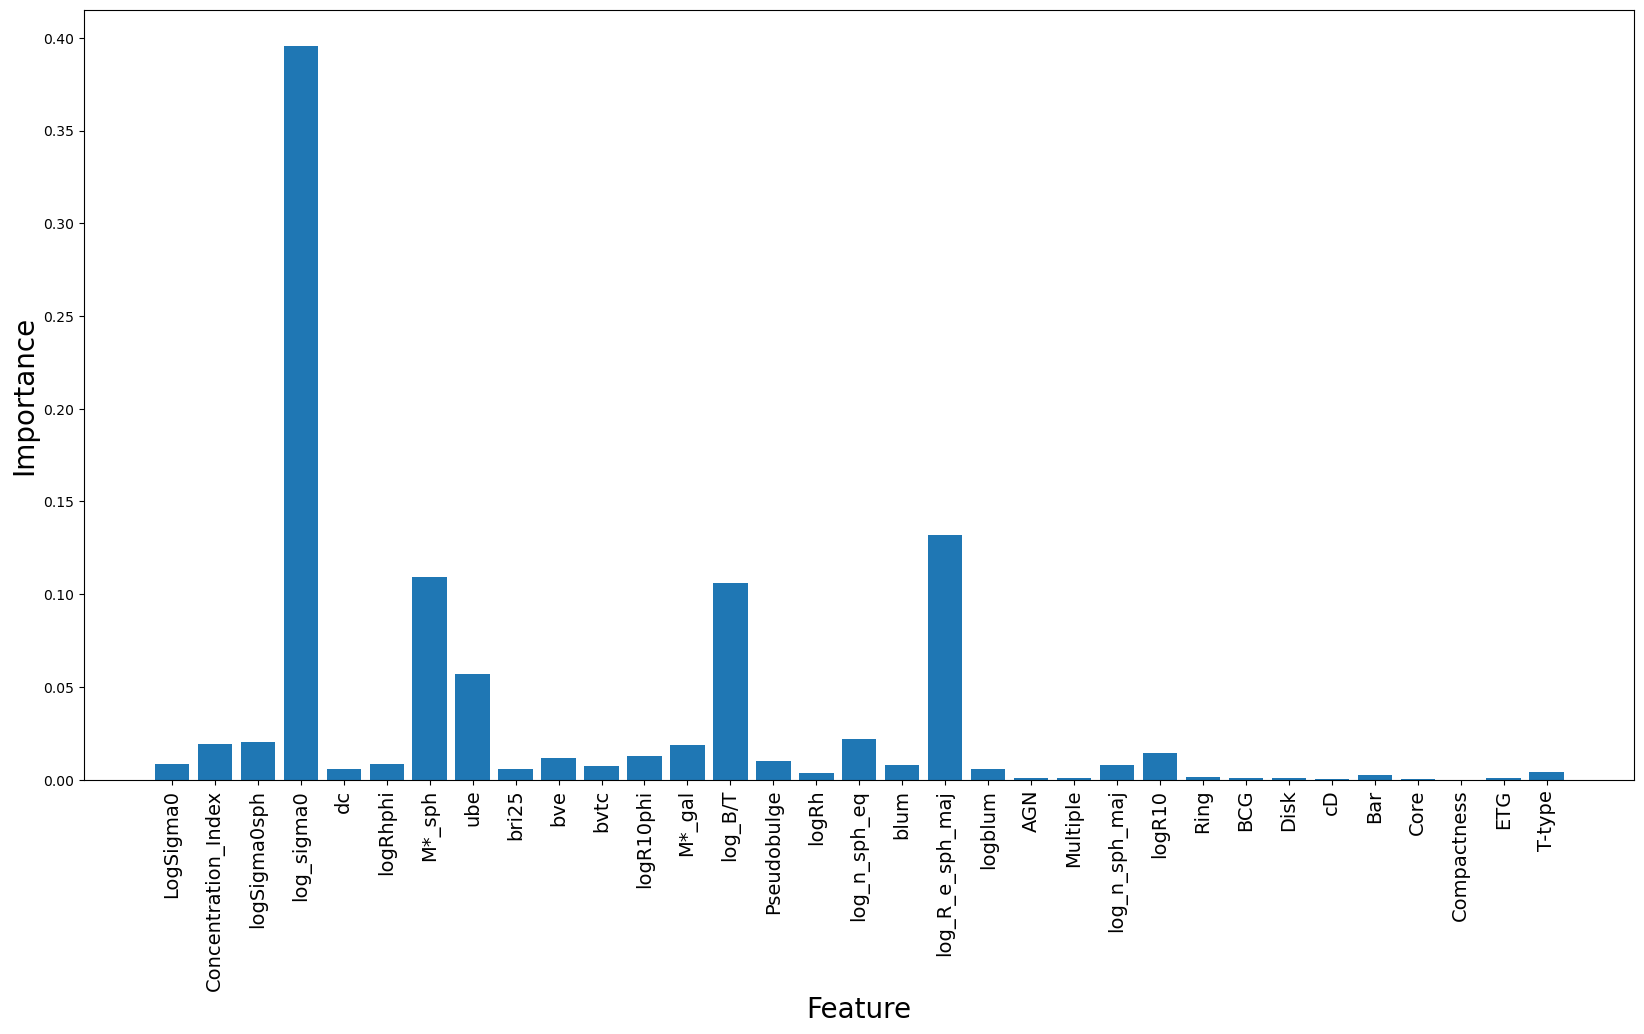

In [11]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

x_ticks_labels = X.columns
x_ticks=np.arange(len(feature_importances))
# Plot feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X.shape[1]), feature_importances, align="center")
plt.xlabel("Feature",fontsize=20)
plt.ylabel("Importance",fontsize=20)
plt.xticks(ticks=x_ticks,labels=x_ticks_labels, rotation=90, fontsize=14)
plt.show()

In [12]:
importance_order=feature_importances.argsort()[::-1]
importance=np.sort(feature_importances)[::-1]
#importance_order
for i in range(len(importance_order)):
    print(i+1,X.columns[importance_order[i]],importance[i])

1 log_sigma0 0.39546599344459976
2 log_R_e_sph_maj 0.13170983041892037
3 M*_sph 0.10902100580480992
4 log_B/T 0.10588126560962582
5 ube 0.05695239249032624
6 log_n_sph_eq 0.02199397675121039
7 logSigma0sph 0.02004070925034205
8 Concentration_Index 0.019011391904627292
9 M*_gal 0.01887976488568182
10 logR10 0.014426405049216152
11 logR10phi 0.01285819837538036
12 bve 0.01179357656341358
13 Pseudobulge 0.010256959111064671
14 LogSigma0 0.008611209256003
15 logRhphi 0.00841623720550215
16 blum 0.007887981607429529
17 log_n_sph_maj 0.007669726131912816
18 bvtc 0.007085141388845764
19 dc 0.005845540840639306
20 logblum 0.005754619985980605
21 bri25 0.005568798593099875
22 T-type 0.003922784988631978
23 logRh 0.003437010239224287
24 Bar 0.002287735928255756
25 Ring 0.0011976667395759487
26 Multiple 0.0008504735682868472
27 ETG 0.0008502551297722836
28 BCG 0.0006189245355123941
29 AGN 0.0006155070908977472
30 Disk 0.0006048432471505989
31 cD 0.0002937275348127023
32 Core 0.0001884114416711145

In [13]:
X.columns[importance_order][:10]

Index(['log_sigma0', 'log_R_e_sph_maj', 'M*_sph', 'log_B/T', 'ube',
       'log_n_sph_eq', 'logSigma0sph', 'Concentration_Index', 'M*_gal',
       'logR10'],
      dtype='object')

In [16]:
functions.test_relation(['log_sigma0', 'log_R_e_sph_maj', 'M*_sph', 'log_B/T', 'ube',
       'log_n_sph_eq', 'logSigma0sph', 'Concentration_Index', 'M*_gal',
       'logR10'],ncyclesperiteration=5000,niterations=300)

104


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1761: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. Consider using feature selection techniques to select the most important features (you can do this automatically with the `select_k_features` parameter), or, alternatively, doing a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_R_e_sph_maj
x 2 : M*_sph
x 3 : log_B/T
x 4 : ube
x 5 : log_n_sph_eq
x 6 : logSigma0sph
x 7 : Concentration_Index
x 8 : M*_gal
x 9 : logR10
Eq. selected rmse: 0.2805491829604483


3.5245086787343745*x0 + x1*(-x5 + x9)

Eq. 0 rmse: 0.9172014405196003


8.252746645955588

Eq. 1 rmse: 0.4094850455557965


x2 - 2.3574217941211435

Eq. 2 rmse: 0.3521302438146544


x0 + x2 - 4.618097453352318

Eq. 3 rmse: 0.312662244299145


x0*(0.2573992199488636*x1 + 3.5455815227096346)

Eq. 4 rmse: 0.2805491829604483


3.5245086787343745*x0 + x1*(-x5 + x9)

Eq. 5 rmse: 0.27451449183828297


3.5593951833901616*x0 + (x1 - 0.09341086000970533)*(-x5 + x9)

Eq. 6 rmse: 0.2529785491919479


3.592521999716083*x0 + x9*(x1/x7 + x3)/x6

Eq. 7 rmse: 0.24953382379686925


3.592521999716083*x0 + x9*(x1/x7 + x3)/(x6 - 0.6715780102706426)

Eq. 8 rmse: 0.24651315238158436


3.5766213691716753*x0 + x1*x9/(x7*(x6 - 1.087200011211675 + 0.5407649989090925/x1))

Eq. 9 rmse: 0.24520151827173614


3.6185368817114303*x0 - x9*(x1 - 0.17355609946439501)/(x7*(-x6 - 0.6159357057549559/x1))

Eq. 10 rmse: 0.2374130006881074


3.6185368817114303*x0 - x9*(x1 - 0.23041287494012366)/(x7*(-x6 + (x1 + 0.23315517489323392)/x1))